In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class_path = 'data_AC__TC__2B/ECA_EXAD_AC__TC__2B_20250617T050457Z_20250617T085638Z_05979B.h5'
cth_path = 'data_ATL_CTH_2A/ECA_EXAE_ATL_CTH_2A_20250617T050457Z_20250617T085638Z_05979B.h5'

In [3]:
#--- data from cloud top height
with h5py.File(cth_path, 'r') as f:
    dataset_path = 'ScienceData/ATLID_cloud_top_height'
    cth_data = np.array(f[dataset_path][()])

cth = cth_data.copy().astype(float)
cth[cth > 1e10] = np.nan #--- replace null values
cth /= 1000  #--- convert to km

In [4]:
#--- data from cloud classification
with h5py.File(class_path, 'r') as f:
    dataset1_path = 'ScienceData/synergetic_target_classification'
    class_data = np.array(f[dataset1_path][()])

    dataset2_path = 'ScienceData/height'
    class_height_data = np.array(f[dataset2_path][()])

class_height = class_height_data/1000 #--- convert to km

Plot scatterplot of highest bin containing cloud from feature mask (2-22 IDs) vs. LIDAR cloud height

In [5]:
custom_colors = [
    '#c5c9c7', '#a2653e', '#ffffff', '#ff474c', '#0504aa', '#009337', '#840000',
    '#042e60', '#d8dcd6', '#ffff84', '#f5bf03', '#f97306', '#ff000d', '#5539cc',
    '#2976bb', '#0d75f8', '#014182', '#017b92', '#06b48b', '#aaff32', '#6dedfd',
    '#01f9c6', '#7bc8f6', '#d7fffe', '#a2cffe', '#04d9ff', '#7a9703', '#b2996e',
    '#ffbacd', '#d99b82', '#947e94', '#856798', '#ac86a8', '#59656d', '#76424e',
    '#363737'
]

class_tops = []
class_vals = []

for i in range(class_data.shape[0]):
    classes = class_data[i, :]
    heights = class_height[i, :]

    #--- filter to cloud classes, between 2 and 22
    mask = (classes >= 2) & (classes <= 22)
    filtered_classes = classes[mask]
    filtered_heights = heights[mask]

    if filtered_heights.size > 0:
        max_idx = np.argmax(filtered_heights)
        max_height = filtered_heights[max_idx]
        class_val = filtered_classes[max_idx]

        class_tops.append(max_height)
        class_vals.append(class_val)
    else:
        class_tops.append(np.nan)
        class_vals.append(np.nan)


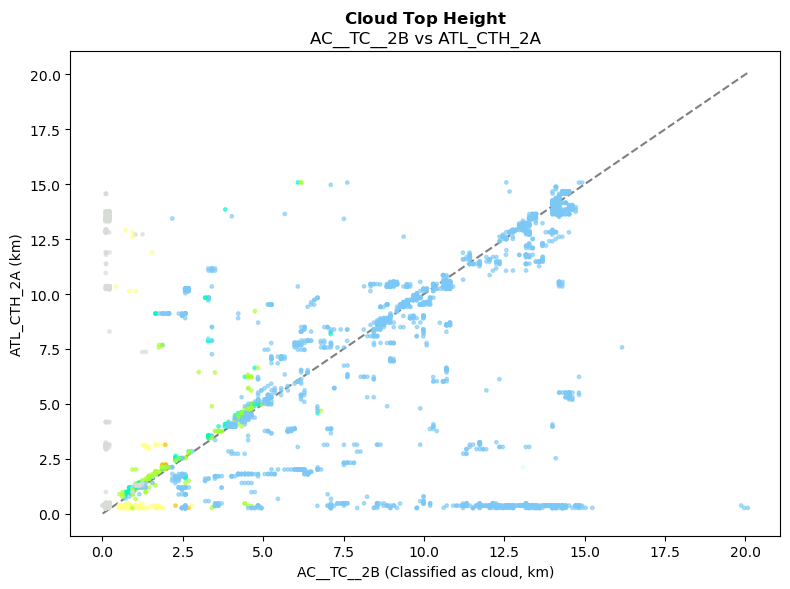

In [6]:
x = np.array(class_tops)
y = np.array(cth)
cvals = np.array(class_vals)

valid = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isnan(cvals))
x_valid = x[valid]
y_valid = y[valid]
cvals_valid = cvals[valid].astype(int)

# Map class values to colors
color_indices = cvals_valid + 1 #--- values start at -1, which is ground
colors = [custom_colors[idx] for idx in color_indices]

plt.figure(figsize=(8, 6))
plt.scatter(x_valid, y_valid, c=colors, alpha=0.6, s=6, zorder=1)

# Add the 1:1 line
min_val = min(x_valid.min(), y_valid.min())
max_val = max(x_valid.max(), y_valid.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', linewidth=1.5, c='grey', zorder=0)

# Labels and title
plt.xlabel('AC__TC__2B (Classified as cloud, km)')
plt.ylabel('ATL_CTH_2A (km)')
plt.title(r'$\bf{Cloud\ Top\ Height}$' + '\nAC__TC__2B vs ATL_CTH_2A')

plt.tight_layout()
plt.show()